# Loan Case Study
## Sarthak Yadav

## 1. Importing libraries and loading datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from scipy import stats

In [3]:
application = pd.read_csv("application_data.csv")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
#pd.set_option('display.max_rows', None)
## I used this to view all rows while looking at null values or column data types

In [9]:
application.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
application = application.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21', 'EXT_SOURCE_1', 'OWN_CAR_AGE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',  'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',  'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',  'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],axis=1)
# Dropping these columns as null counts is a significant fraction of total rows, and hence imputing wouldn't make sense.

## 2. Dealing with null values and outliers

### We fill continuous fields with the mean and categorical fields with the mode

In [11]:
application['AMT_ANNUITY'].fillna(application['AMT_ANNUITY'].mean(), inplace=True)

In [12]:
application['AMT_GOODS_PRICE'].fillna(application['AMT_GOODS_PRICE'].mean(), inplace=True)

In [13]:
application['EXT_SOURCE_2'].fillna(application['EXT_SOURCE_2'].mean(), inplace=True)

In [14]:
application['EXT_SOURCE_3'].fillna(application['EXT_SOURCE_3'].mean(), inplace=True)

In [15]:
application['CNT_FAM_MEMBERS'].fillna(application['CNT_FAM_MEMBERS'].mode()[0], inplace=True)

In [16]:
application['NAME_TYPE_SUITE'].fillna(application['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [17]:
application['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)

In [18]:
application['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(application['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)

In [19]:
application['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(application['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)

In [20]:
application['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(application['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)

In [21]:
application['DAYS_LAST_PHONE_CHANGE'].fillna(application['DAYS_LAST_PHONE_CHANGE'].mode()[0], inplace=True)

In [22]:
application['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0], inplace=True)

In [23]:
application['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0], inplace=True)

In [24]:
application['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace=True)

In [25]:
application['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace=True)

In [26]:
application['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace=True)

In [27]:
application['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace=True)

In [28]:
application.shape

(307511, 53)

### Checking outliers by occupation type

[Text(0, 0, 'Laborers'),
 Text(1, 0, 'Core staff'),
 Text(2, 0, 'Accountants'),
 Text(3, 0, 'Managers'),
 Text(4, 0, 'Drivers'),
 Text(5, 0, 'Sales staff'),
 Text(6, 0, 'Cleaning staff'),
 Text(7, 0, 'Cooking staff'),
 Text(8, 0, 'Private service staff'),
 Text(9, 0, 'Medicine staff'),
 Text(10, 0, 'Security staff'),
 Text(11, 0, 'High skill tech staff'),
 Text(12, 0, 'Waiters/barmen staff'),
 Text(13, 0, 'Low-skill Laborers'),
 Text(14, 0, 'Realty agents'),
 Text(15, 0, 'Secretaries'),
 Text(16, 0, 'IT staff'),
 Text(17, 0, 'HR staff')]

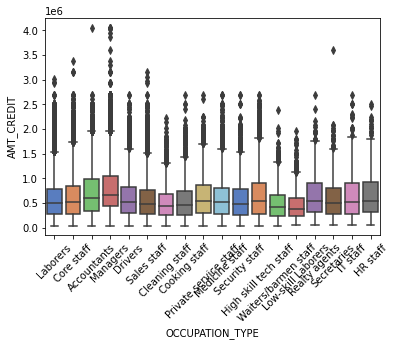

In [29]:
ax = sb.boxplot(y='AMT_CREDIT', x='OCCUPATION_TYPE', 
                 data=application, 
                 palette='muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

### As outliers are stratified differently for different occupations, we make sub-datasets to deal with outliers individually.
#### Z-score will be used to identify and demarcate outliers.

In [30]:
laborers = application[application['OCCUPATION_TYPE']=='Laborers']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

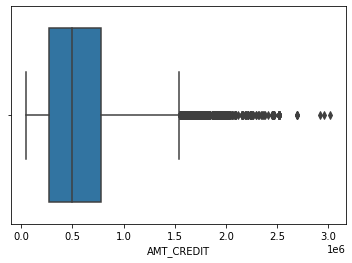

In [31]:
sb.boxplot(laborers['AMT_CREDIT'])

In [32]:
laborers['z_score']=stats.zscore(laborers['AMT_CREDIT'])

<ipython-input-32-433b2d91d406>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laborers['z_score']=stats.zscore(laborers['AMT_CREDIT'])


In [33]:
laborers = laborers.loc[laborers['z_score'].abs()<=2.4]

### As seen, the value to compare z score with should be between 2 and 3 (inclusive)
#### If you were to run the previous boxplot again after this command, you would notice the absence of outliers.

In [34]:
core = application[application['OCCUPATION_TYPE']=='Core staff']


E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

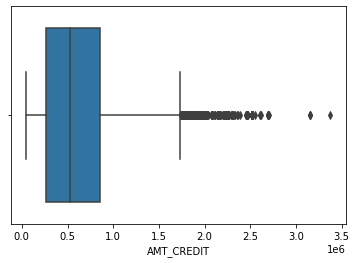

In [35]:
sb.boxplot(core['AMT_CREDIT'])

In [36]:
core['z_score']=stats.zscore(core['AMT_CREDIT'])

<ipython-input-36-941ce8c4b0bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core['z_score']=stats.zscore(core['AMT_CREDIT'])


In [37]:
core = core.loc[core['z_score'].abs()<=2.3]

In [38]:
acc = application[application['OCCUPATION_TYPE']=='Accountants']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

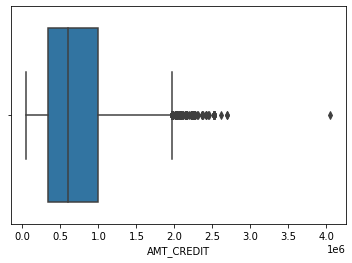

In [39]:
sb.boxplot(acc['AMT_CREDIT'])

In [40]:
acc['z_score']=stats.zscore(acc['AMT_CREDIT'])

<ipython-input-40-513292ee109c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc['z_score']=stats.zscore(acc['AMT_CREDIT'])


In [41]:
acc = acc.loc[acc['z_score'].abs()<=2.3]

In [42]:
man = application[application['OCCUPATION_TYPE']=='Managers']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

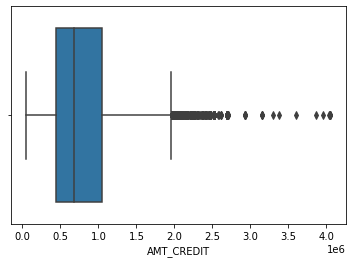

In [43]:
sb.boxplot(man['AMT_CREDIT'])

In [44]:
man['z_score']=stats.zscore(man['AMT_CREDIT'])

<ipython-input-44-96d0401e93db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man['z_score']=stats.zscore(man['AMT_CREDIT'])


In [45]:
man = man.loc[man['z_score'].abs()<=2.35]

In [46]:
driv = application[application['OCCUPATION_TYPE']=='Drivers']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

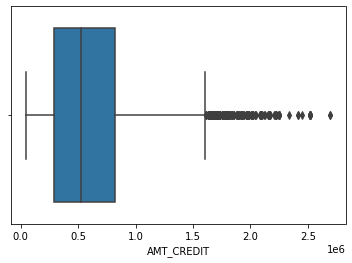

In [47]:
sb.boxplot(driv['AMT_CREDIT'])

In [48]:
driv['z_score']=stats.zscore(driv['AMT_CREDIT'])

<ipython-input-48-d721bc111cb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driv['z_score']=stats.zscore(driv['AMT_CREDIT'])


In [49]:
driv = driv.loc[driv['z_score'].abs()<=2.5]

In [50]:
sales = application[application['OCCUPATION_TYPE']=='Sales staff']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

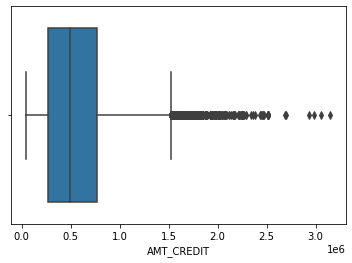

In [51]:
sb.boxplot(sales['AMT_CREDIT'])

In [52]:
sales['z_score']=stats.zscore(sales['AMT_CREDIT'])

<ipython-input-52-22ef7a28e16a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['z_score']=stats.zscore(sales['AMT_CREDIT'])


In [53]:
sales = sales.loc[sales['z_score'].abs()<=2.45]

In [54]:
clean = application[application['OCCUPATION_TYPE']=='Cleaning staff']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

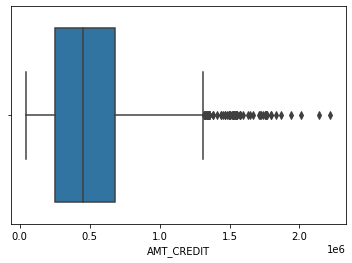

In [55]:
sb.boxplot(clean['AMT_CREDIT'])

In [56]:
clean['z_score']=stats.zscore(clean['AMT_CREDIT'])

<ipython-input-56-d70c2b726402>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['z_score']=stats.zscore(clean['AMT_CREDIT'])


In [57]:
clean = clean.loc[clean['z_score'].abs()<=2.375]

In [58]:
cook = application[application['OCCUPATION_TYPE']=='Cooking staff']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

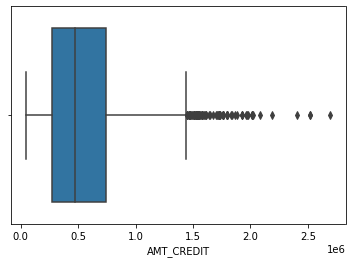

In [59]:
sb.boxplot(cook['AMT_CREDIT'])

In [60]:
cook['z_score']=stats.zscore(cook['AMT_CREDIT'])

<ipython-input-60-b7a8b535badc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cook['z_score']=stats.zscore(cook['AMT_CREDIT'])


In [61]:
cook = cook.loc[cook['z_score'].abs()<=2.4]

In [62]:
priv = application[application['OCCUPATION_TYPE']=='Private service staff']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

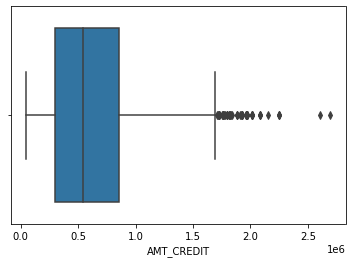

In [63]:
sb.boxplot(priv['AMT_CREDIT'])

In [64]:
priv['z_score']=stats.zscore(priv['AMT_CREDIT'])

<ipython-input-64-ffa43ea0441c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priv['z_score']=stats.zscore(priv['AMT_CREDIT'])


In [65]:
priv = priv.loc[priv['z_score'].abs()<=2.45]

In [66]:
sec = application[application['OCCUPATION_TYPE']=='Security staff']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

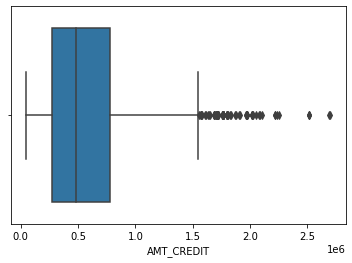

In [67]:
sb.boxplot(sec['AMT_CREDIT'])

In [68]:
sec['z_score']=stats.zscore(sec['AMT_CREDIT'])

<ipython-input-68-d32dec3cc319>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sec['z_score']=stats.zscore(sec['AMT_CREDIT'])


In [69]:
sec = sec.loc[sec['z_score'].abs()<=2.45]

In [70]:
med = application[application['OCCUPATION_TYPE']=='Medicine staff']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

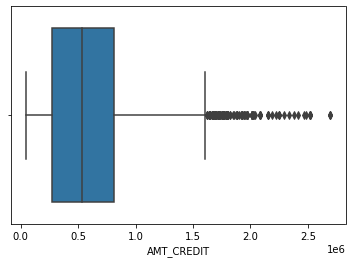

In [71]:
sb.boxplot(med['AMT_CREDIT'])

In [72]:
med['z_score']=stats.zscore(med['AMT_CREDIT'])

<ipython-input-72-60dea8eaf63f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med['z_score']=stats.zscore(med['AMT_CREDIT'])


In [73]:
med = med.loc[med['z_score'].abs()<=2.5]

In [74]:
tech = application[application['OCCUPATION_TYPE']=='High skill tech staff']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

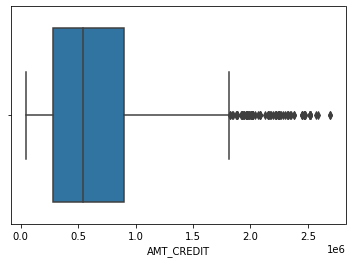

In [75]:
sb.boxplot(tech['AMT_CREDIT'])

In [76]:
tech['z_score']=stats.zscore(tech['AMT_CREDIT'])

<ipython-input-76-65e0299da67b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech['z_score']=stats.zscore(tech['AMT_CREDIT'])


In [77]:
tech = tech.loc[tech['z_score'].abs()<=2.4]

In [78]:
barm = application[application['OCCUPATION_TYPE']=='Waiters/barmen staff']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

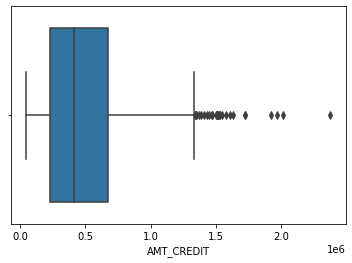

In [79]:
sb.boxplot(barm['AMT_CREDIT'])

In [80]:
barm['z_score']=stats.zscore(barm['AMT_CREDIT'])

<ipython-input-80-6992eecd0571>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barm['z_score']=stats.zscore(barm['AMT_CREDIT'])


In [81]:
barm = barm.loc[barm['z_score'].abs()<=1.8]

In [82]:
low = application[application['OCCUPATION_TYPE']=='Low-skill Laborers']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

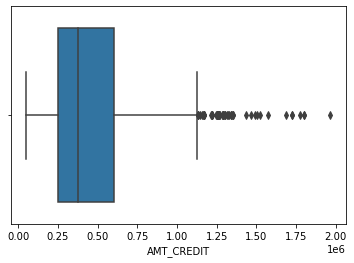

In [83]:
sb.boxplot(low['AMT_CREDIT'])

In [84]:
low['z_score']=stats.zscore(low['AMT_CREDIT'])

<ipython-input-84-fe04ba42fb78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low['z_score']=stats.zscore(low['AMT_CREDIT'])


In [85]:
low = low.loc[low['z_score'].abs()<=1.85]

In [86]:
real = application[application['OCCUPATION_TYPE']=='Realty agents']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

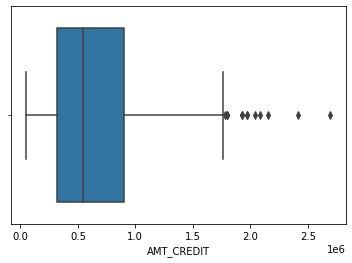

In [87]:
sb.boxplot(real['AMT_CREDIT'])

In [88]:
real['z_score']=stats.zscore(real['AMT_CREDIT'])

<ipython-input-88-5b7450c4314d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['z_score']=stats.zscore(real['AMT_CREDIT'])


In [89]:
real= real.loc[real['z_score'].abs()<=2.75]

In [90]:
secr = application[application['OCCUPATION_TYPE']=='Secretaries']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

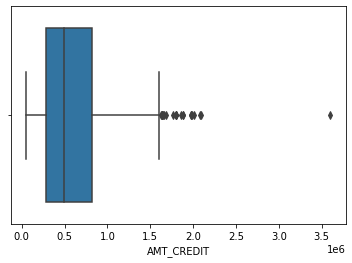

In [91]:
sb.boxplot(secr['AMT_CREDIT'])

In [92]:
secr['z_score']=stats.zscore(secr['AMT_CREDIT'])

<ipython-input-92-75ea6a190f8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secr['z_score']=stats.zscore(secr['AMT_CREDIT'])


In [93]:
secr= secr.loc[secr['z_score'].abs()<=2.5]

In [94]:
it = application[application['OCCUPATION_TYPE']=='IT staff']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

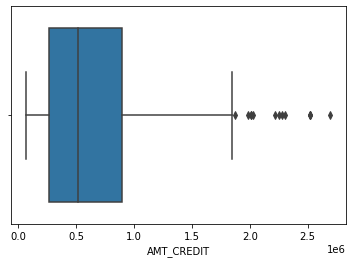

In [95]:
sb.boxplot(it['AMT_CREDIT'])

In [96]:
it['z_score']=stats.zscore(it['AMT_CREDIT'])

<ipython-input-96-3a84d750d0a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  it['z_score']=stats.zscore(it['AMT_CREDIT'])


In [97]:
it= it.loc[it['z_score'].abs()<=2.1]

In [98]:
hr = application[application['OCCUPATION_TYPE']=='HR staff']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

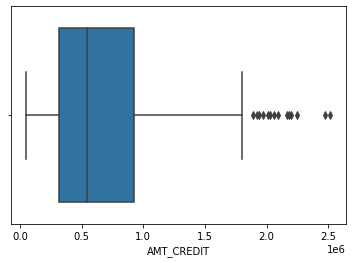

In [99]:
sb.boxplot(hr['AMT_CREDIT'])

In [100]:
hr['z_score']=stats.zscore(hr['AMT_CREDIT'])

<ipython-input-100-bcc3aac1b3b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr['z_score']=stats.zscore(hr['AMT_CREDIT'])


In [101]:
hr= hr.loc[hr['z_score'].abs()<=2.375]

### Now, we concatenate all subsets to get a singular dataframe.

In [102]:
frames=[laborers, core, acc, man, driv, sales, clean, cook, priv, sec, med, tech, barm, low, real, secr, it, hr]

In [103]:
app2=pd.concat(frames)

In [104]:
app2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,z_score
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.437834
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.162831
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.688529
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.213878
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,0.746644,0.510853,2.0,0.0,2.0,0.0,-1673.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.442098


In [105]:
app2.shape

(205569, 54)

[Text(0, 0, 'Laborers'),
 Text(1, 0, 'Core staff'),
 Text(2, 0, 'Accountants'),
 Text(3, 0, 'Managers'),
 Text(4, 0, 'Drivers'),
 Text(5, 0, 'Sales staff'),
 Text(6, 0, 'Cleaning staff'),
 Text(7, 0, 'Cooking staff'),
 Text(8, 0, 'Private service staff'),
 Text(9, 0, 'Security staff'),
 Text(10, 0, 'Medicine staff'),
 Text(11, 0, 'High skill tech staff'),
 Text(12, 0, 'Waiters/barmen staff'),
 Text(13, 0, 'Low-skill Laborers'),
 Text(14, 0, 'Realty agents'),
 Text(15, 0, 'Secretaries'),
 Text(16, 0, 'IT staff'),
 Text(17, 0, 'HR staff')]

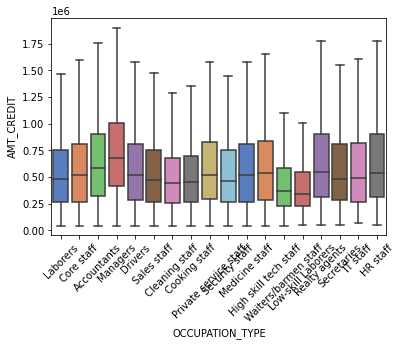

In [106]:
ax = sb.boxplot(y='AMT_CREDIT', x='OCCUPATION_TYPE', 
                 data=app2, 
                 palette="muted")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

### As seen, outliers have been treated according to occupation types.

## 3. EDA

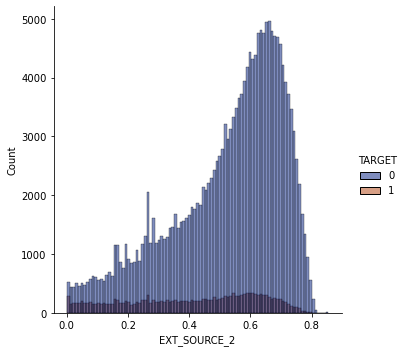

In [107]:
sb.displot(x='EXT_SOURCE_2', hue='TARGET', data=app2, palette='dark')

### Clearly, peak values for non-defaulters by metric of external source 2 lies between 0.6 and 0.65

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

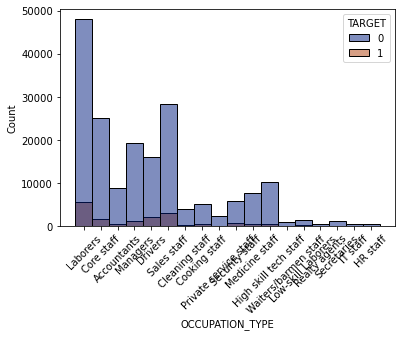

In [108]:
ax=sb.histplot(x='OCCUPATION_TYPE', hue='TARGET', data=app2, palette='dark')
plt.xticks(rotation=45)

### Upon scaling, the defaulters seem to be evenly distributed along all occupations.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57],
 [Text(0, 0, 'Business Entity Type 3'),
  Text(1, 0, 'Government'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Electricity'),
  Text(4, 0, 'Business Entity Type 2'),
  Text(5, 0, 'Transport: type 2'),
  Text(6, 0, 'Construction'),
  Text(7, 0, 'Housing'),
  Text(8, 0, 'Self-employed'),
  Text(9, 0, 'Industry: type 11'),
  Text(10, 0, 'Industry: type 1'),
  Text(11, 0, 'Transport: type 4'),
  Text(12, 0, 'Restaurant'),
  Text(13, 0, 'Industry: type 3'),
  Text(14, 0, 'Industry: type 9'),
  Text(15, 0, 'Business Entity Type 1'),
  Text(16, 0, 'Postal'),
  Text(17, 0, 'Industry: type 2'),
  Text(18, 0, 'Trade: type 3'),
  Text(19, 0, 'Services'),
  Text(20, 0, '

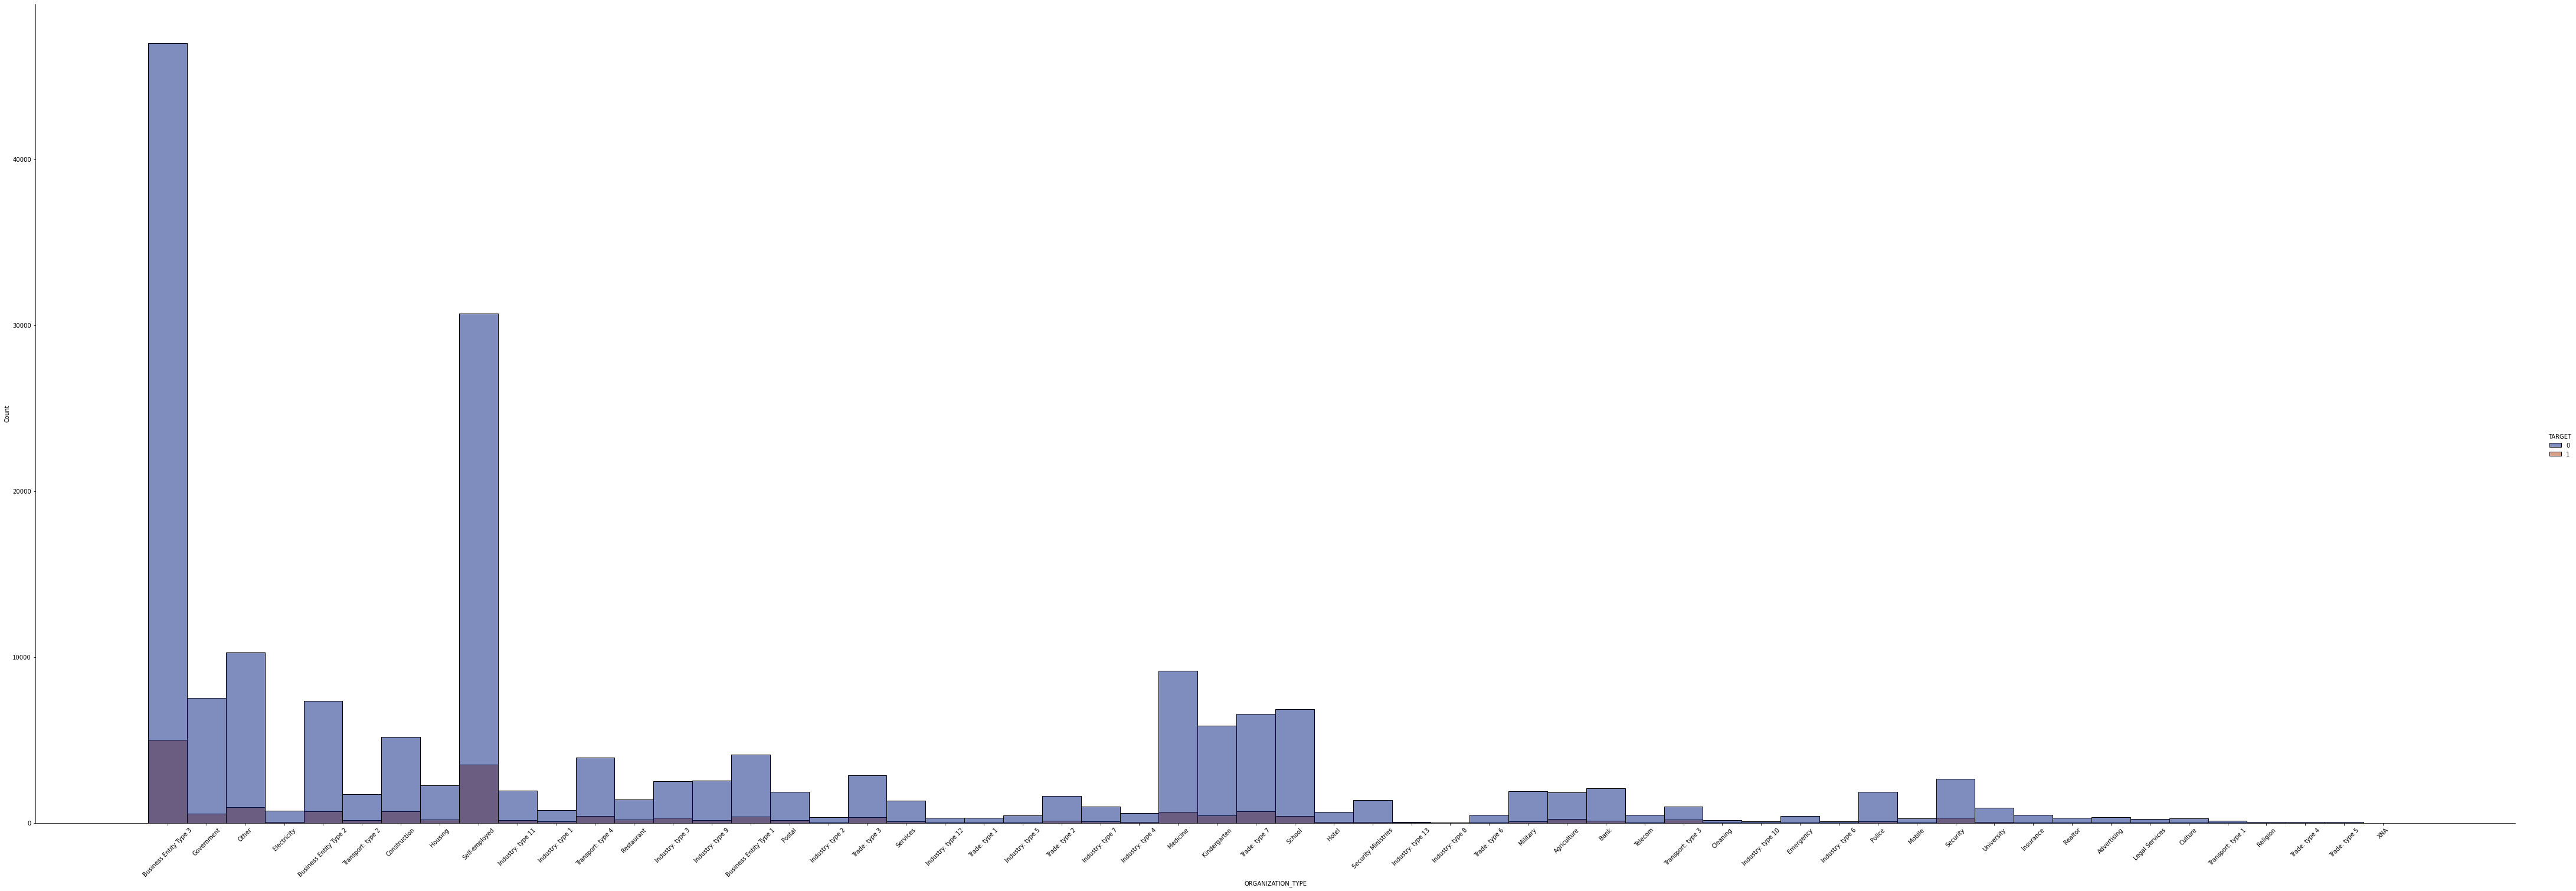

In [109]:
ax2=sb.displot(x='ORGANIZATION_TYPE', hue='TARGET', data=app2, palette='dark', height=20, aspect=3)
plt.xticks(rotation=45)

#Please scroll down and open image in new tab to zoom in.

### Again, defaulters are evenly distributed amongst all organization types.

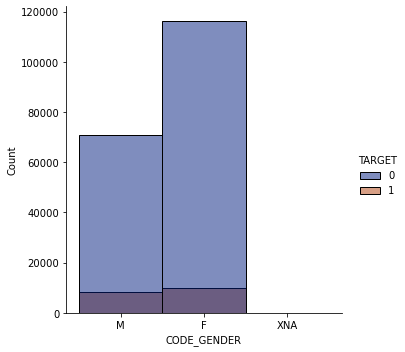

In [110]:
sb.displot(x='CODE_GENDER', hue='TARGET', data=app2, palette='dark')

### Upon scaling, default rates seem to be lower for females.

In [111]:
#pd.set_option('display.max_rows', 10)

In [112]:
app2.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

### Creating heatmap for correlations amongst continuous variables.

In [113]:
corre=app2[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE']]

<AxesSubplot:>

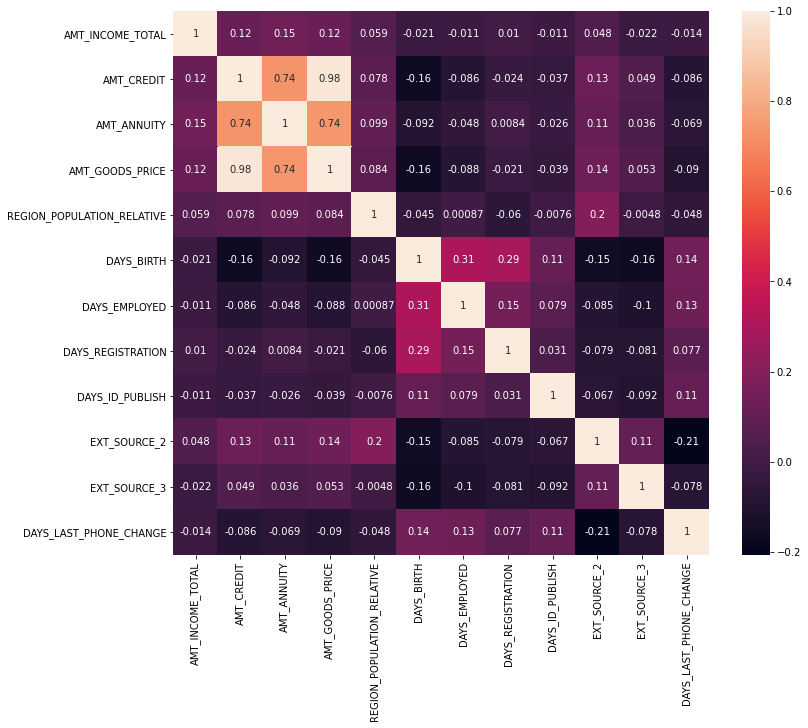

In [114]:
fig, ax = plt.subplots(figsize=(12, 10))
sb.heatmap(corre.corr(), annot=True) 

### (After removal of null-heavy fields), fields with highest correlations - 
#### AMT_CREDIT and AMT_GOODS_PRICE, AMT_CREDIT and AMT_ANNUITY, AMT_ANNUITY and AMT_GOODS_PRICE, AMT_CREDIT and EXT_SOURCE_2, REGION_POPULATION_RELATIVE and EXT_SOURCE_2, DAYS_BIRTH and DAYS_LAST_PHONE_CHANGE, DAYS_BIRTH and DAYS_EMPLOYED, DAYS_BIRTH and DAYS_REGISTRATION, DAYS_EMPLOYED and DAYS_REGISTRATION, AMT_GOODS_PRICE and EXT_SOURCE_2

### Only significant correlations for numeric data are between credit amount, annuity amount, and goods price.

### Bivariate Analysis:

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

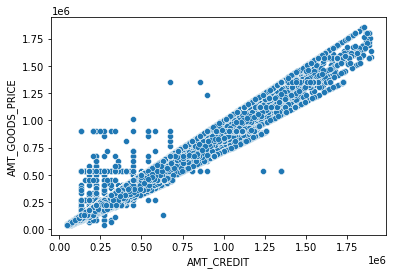

In [115]:
sb.scatterplot(data=app2, x='AMT_CREDIT', y='AMT_GOODS_PRICE')

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

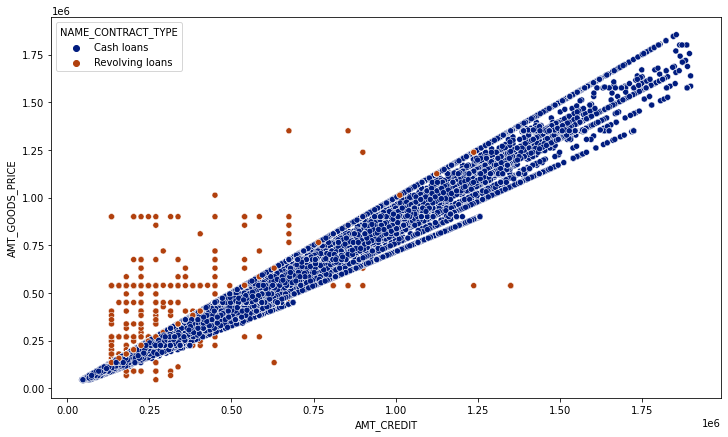

In [116]:
fig, ax = plt.subplots(figsize=(12, 7))
sb.scatterplot(data = app2, x='AMT_CREDIT', y='AMT_GOODS_PRICE', hue='NAME_CONTRACT_TYPE', palette='dark')

### 1. All outliers are revolving loans.
### 2. Credit amount and goods price has an almost linear relationship for cash loans.

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

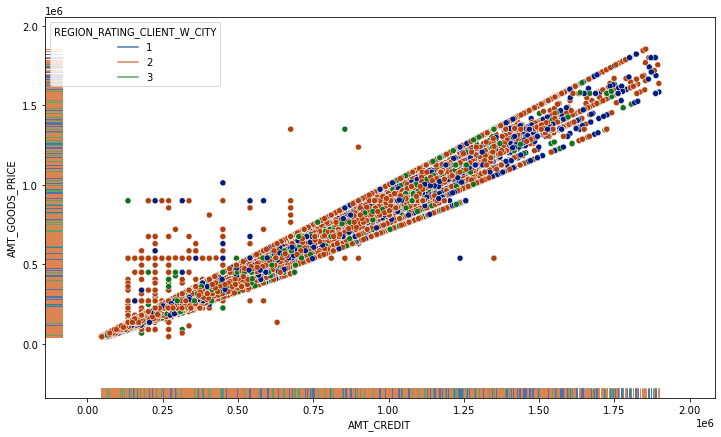

In [117]:
fig, ax = plt.subplots(figsize=(12, 7))
sb.scatterplot(data = app2, x='AMT_CREDIT', y='AMT_GOODS_PRICE', hue='REGION_RATING_CLIENT_W_CITY', palette='dark')
sb.rugplot(data=app2, x='AMT_CREDIT', y='AMT_GOODS_PRICE', hue='REGION_RATING_CLIENT_W_CITY', lw=1, palette='deep')

### Blue dots represent top tier cities. They are concentrated towards the higher end of the credit bracket.
### Customers with region rating 1 mostly opt for high-credit loans.

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

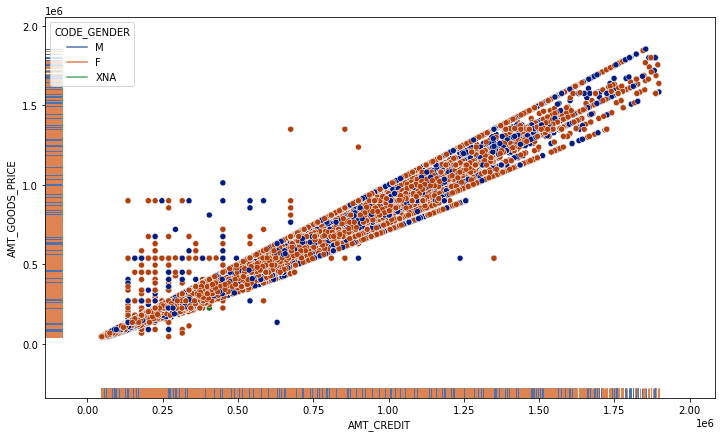

In [118]:
fig, ax = plt.subplots(figsize=(12, 7))
sb.scatterplot(data = app2, x='AMT_CREDIT', y='AMT_GOODS_PRICE', hue='CODE_GENDER', palette='dark')
sb.rugplot(data=app2, x='AMT_CREDIT', y='AMT_GOODS_PRICE', hue='CODE_GENDER', lw=1, palette='deep')

### Male customers are more concentrated towards the middle and higher end of credit amount bracket.

<AxesSubplot:xlabel='CODE_GENDER', ylabel='AMT_CREDIT'>

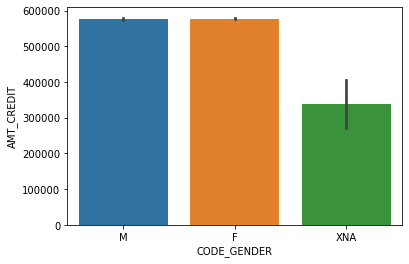

In [119]:
sb.barplot(x='CODE_GENDER', y='AMT_CREDIT', data=app2)

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_ANNUITY'>

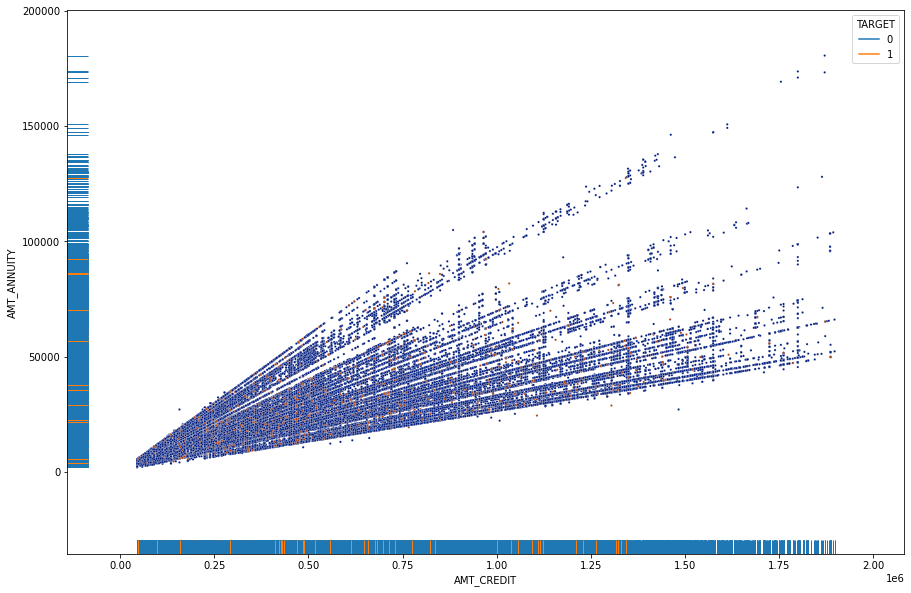

In [120]:
fig, ax = plt.subplots(figsize=(15, 10))
sb.scatterplot(data = app2, x='AMT_CREDIT', y='AMT_ANNUITY', hue='TARGET', palette='dark', s=5)
sb.rugplot(data=app2, x='AMT_CREDIT', y='AMT_ANNUITY', hue='TARGET', lw=1)

### Default frequency for contracts with credit amount > 1350000 is 0.

In [121]:
app2['Income/Debt']=app2['AMT_INCOME_TOTAL']/app2['AMT_CREDIT']

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CODE_GENDER', ylabel='AMT_INCOME_TOTAL'>

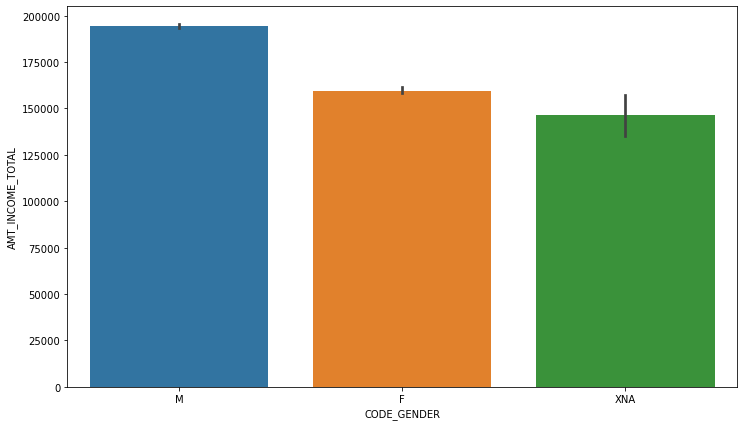

In [122]:
fig, ax = plt.subplots(figsize=(12, 7))
sb.barplot('CODE_GENDER', 'AMT_INCOME_TOTAL', data=app2)

### Univariate Analysis

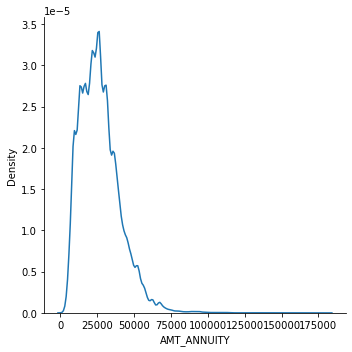

In [123]:
sb.displot(app2['AMT_ANNUITY'], kind='kde')

### The graph is right-skewed with some outliers.

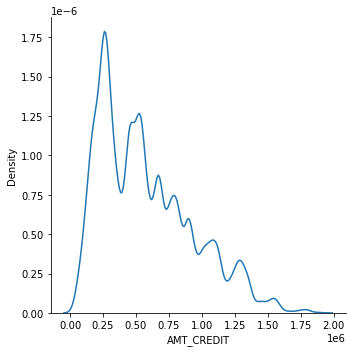

In [124]:
sb.displot(app2['AMT_CREDIT'], kind='kde')

### The curve is right-skewed, unevenly distributed.

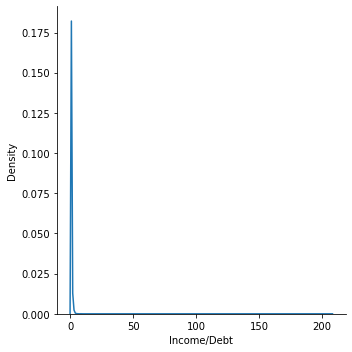

In [125]:
sb.displot(app2['Income/Debt'], kind='kde')

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_ANNUITY'>

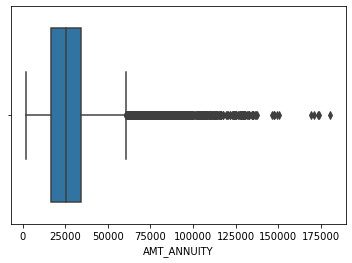

In [126]:
sb.boxplot(app2['AMT_ANNUITY'])

### Clearly, the distribution is right-skewed 

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='AMT_ANNUITY'>

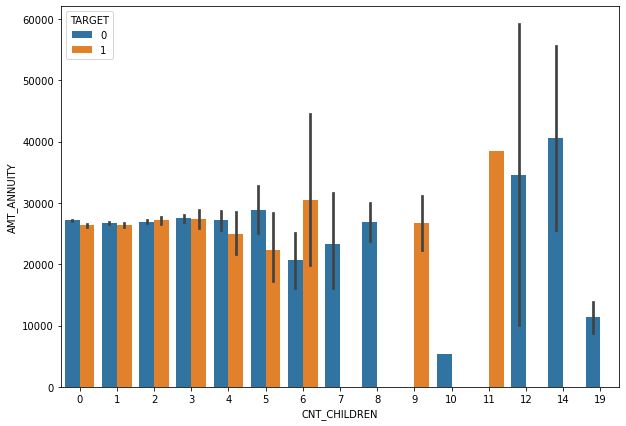

In [127]:
fig, ax = plt.subplots(figsize = (10,7))
sb.barplot(x='CNT_CHILDREN', y='AMT_ANNUITY', data=app2, hue='TARGET')

### Can be seen that for 6, 9 and 11 children, default rates are maximum, whereas for 7, 8, 10, 12, 14 and 19, they are minimum. For all others, they're comparably similar.

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income/Debt'>

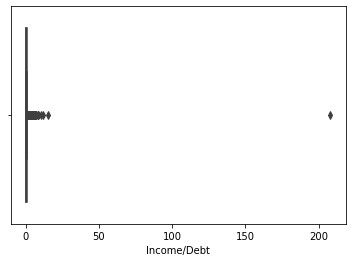

In [128]:
sb.boxplot(app2['Income/Debt'])

In [129]:
app2['zID']=stats.zscore(app2['Income/Debt'])

In [130]:
app2['Income/Debt'] = app2['Income/Debt'].loc[app2['zID'].abs()<=2]

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


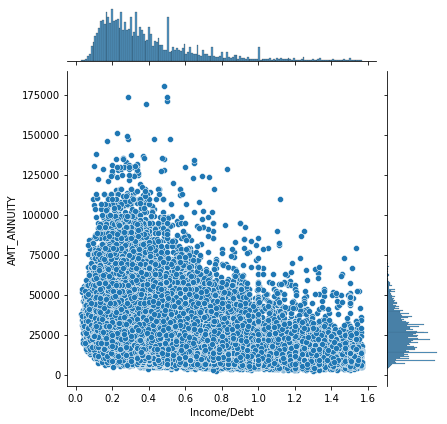

In [131]:
sb.jointplot('Income/Debt', 'AMT_ANNUITY', data=app2)

### We observe that the income/debt ratio is unevenlt distributed along annuity amount.

## 4. Previous application dataset

In [132]:
previous = pd.read_csv("previous_application.csv")

In [133]:
previous.shape

(1670214, 37)

In [134]:
previous.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [135]:
round(100*(previous.isnull().sum()/len(previous.index)), 2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [136]:
prev1 = previous.drop(['AMT_ANNUITY','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE','CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 'DAYS_DECISION'], axis=1)

In [137]:
pd.set_option('display.max_rows',10)

In [138]:
prev1.sort_values(by=['SK_ID_PREV'])
prev1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,17145.0,Y,1,XAP,Approved,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,607500.0,Y,1,XNA,Approved,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,112500.0,Y,1,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,450000.0,Y,1,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,337500.0,Y,1,Repairs,Refused,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,267295.5,311400.0,267295.5,Y,1,XAP,Approved,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,87750.0,64291.5,87750.0,Y,1,XAP,Approved,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,105237.0,102523.5,105237.0,Y,1,XAP,Approved,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,180000.0,191880.0,180000.0,Y,1,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,low_normal,Cash X-Sell: low


In [139]:
prev1['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [140]:
prev1.drop(prev1[prev1['NAME_CONTRACT_TYPE'] == "XNA"].index, inplace=True)

In [141]:
prev1.shape

(1669868, 21)

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

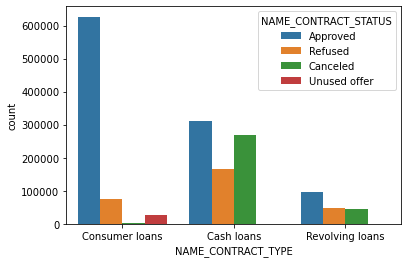

In [142]:
sb.countplot(x = 'NAME_CONTRACT_TYPE', hue= "NAME_CONTRACT_STATUS", data = prev1)

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

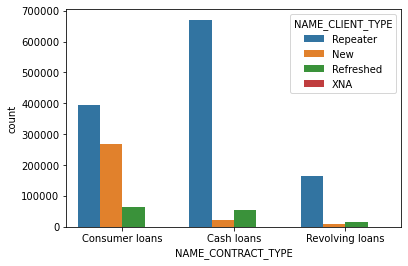

In [143]:
sb.countplot(x = 'NAME_CONTRACT_TYPE', hue= "NAME_CLIENT_TYPE", data = prev1)

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

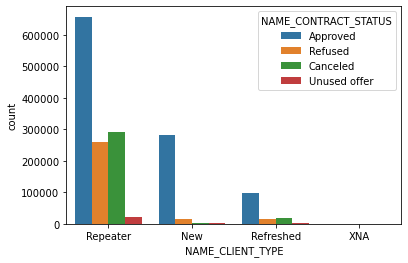

In [144]:
sb.countplot(x = "NAME_CLIENT_TYPE", hue= "NAME_CONTRACT_STATUS" , data = prev1)

E:\Code\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_APPLICATION', ylabel='AMT_CREDIT'>

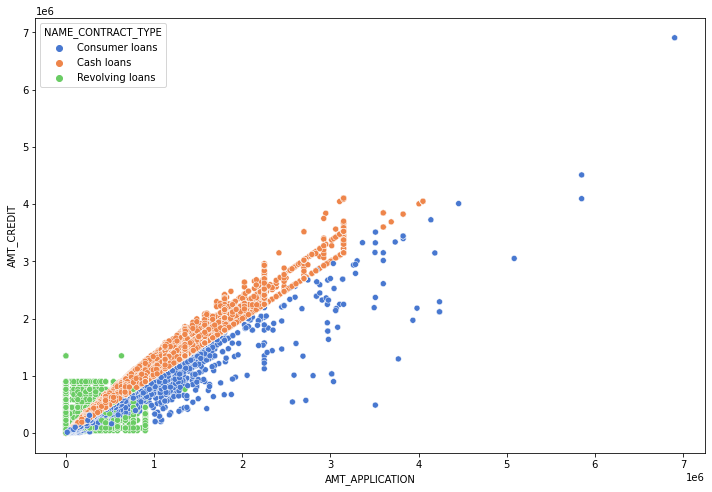

In [145]:
fig, ax = plt.subplots(figsize=(12,8))
sb.scatterplot('AMT_APPLICATION', 'AMT_CREDIT', hue='NAME_CONTRACT_TYPE', data=prev1, palette = 'muted')

### 1. Revolving loans are confined to the rectangular area between 0 and 1 (1e6).
### 2. Cash loans are almost linearly related on application amount and credit amount.
### 3. Consumer loans are slightly linear, with a bias towards application amount and some outliers.

In [146]:
prev1.dtypes

SK_ID_PREV                int64
SK_ID_CURR                int64
NAME_CONTRACT_TYPE       object
AMT_APPLICATION         float64
AMT_CREDIT              float64
                         ...   
CHANNEL_TYPE             object
SELLERPLACE_AREA          int64
NAME_SELLER_INDUSTRY     object
NAME_YIELD_GROUP         object
PRODUCT_COMBINATION      object
Length: 21, dtype: object

### We get dummy columns for all categorical variables' values.

In [147]:
corr3=pd.get_dummies(prev1)

<AxesSubplot:>

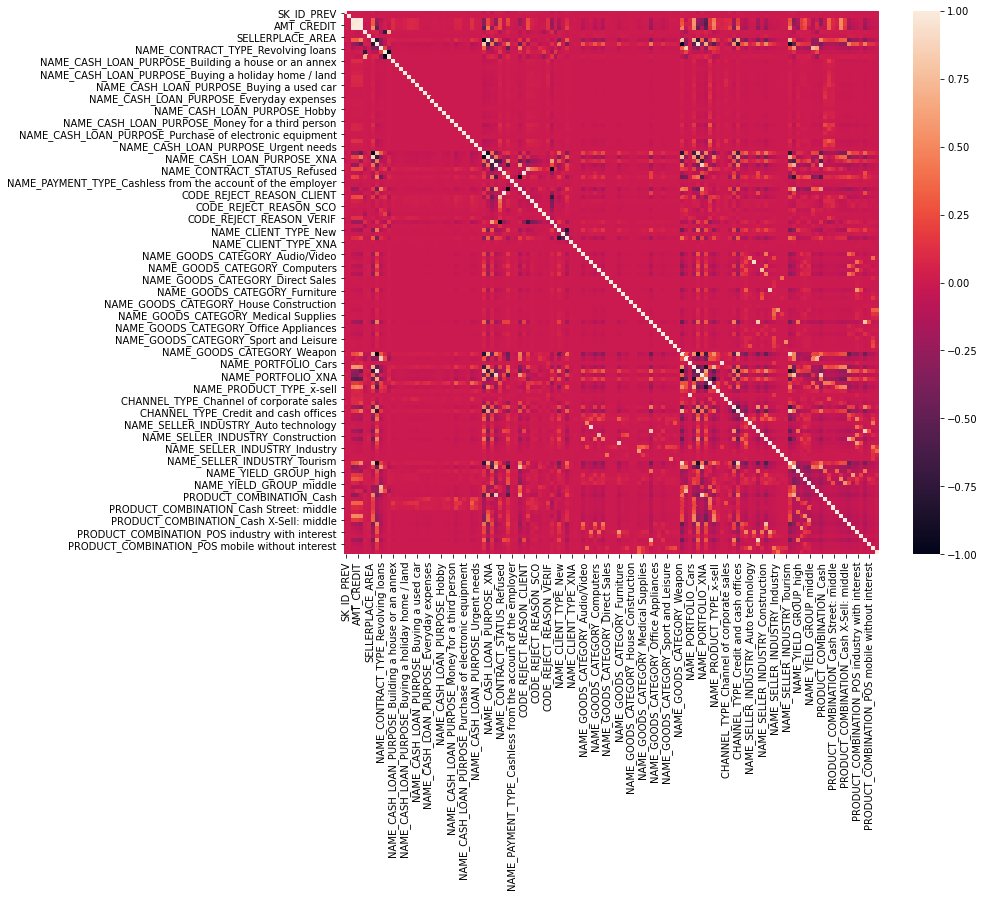

In [148]:
fig, ax = plt.subplots(figsize=(12, 10))
sb.heatmap(corr3.corr()) 

### 1. All white spots are areas of high correlation (open image in new tab and zoom to observe)
### 2. Most variables (including dummies) have a correlation of 0.
### 3. Some variables are negatively correlated.